In [ ]:
#Imports
import pandas as pd
import requests
import matplotlib.pyplot as plt
import json
import numpy as np
from pandas.api.types import is_string_dtype
import os
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import pandas as pd
%matplotlib inline
from IPython.core.pylabtools import figsize
from sklearn.preprocessing import StandardScaler,Normalizer,FunctionTransformer,QuantileTransformer,PowerTransformer
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression,HuberRegressor,Lasso,BayesianRidge,Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor, AdaBoostRegressor
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
import warnings
from sklearn.svm import SVR
import statsmodels.api as sm
import re
import plotly.express as px
import plotly.graph_objects as go


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
res=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/res_bron_2020_no_base.csv') 
#edu=pd.read_csv('edu_bro_2020.csv')
#off=pd.read_csv('off_man_2020.csv')/content/drive/MyDrive/Colab Notebooks/res_bron_2020.csv

In [ ]:
res.drop(['Unnamed: 0','property_id'],axis=1, inplace=True)
#edu.drop('Unnamed: 0',axis=1, inplace=True)
#off.drop('Unnamed: 0',axis=1, inplace=True)

In [ ]:
res['score']=res['score'].astype(int)
#res['property_id']=res['property_id'].astype(int)
res['year_built']=res['year_built'].astype(int)

In [ ]:
res.shape

(4047, 26)

In [ ]:
res.tail()

,score,year_built,number_of_buildings,occupancy,weather_normalized_site_electricity_intensity_kwh_ft,weather_normalized_site_natural_gas_intensity_therms_ft,electricity_use_grid_purchase_and_generated_from_onsite_renewable_systems_kwh,total_ghg_emissions_intensity_kgco2e_ft,direct_ghg_emissions_intensity_kgco2e_ft,egrid_output_emissions_rate_kgco2e_mbtu,...,multifamily_housing_percent_that_can_be_cooled,multifamily_housing_percent_that_can_be_heated,water_use_all_water_sources_kgal,number_of_active_energy_meters_used_to_compute_metrics,number_of_active_energy_meters_not_used_to_compute_metrics,number_of_active_it_meters,community_board,census_tract,longitude,latitude
4042,95,1909,1,100,7.104354,0.509647,887466.467406,6.2,6.200000,79.5,...,73.359702,95.784477,4594.425778,1.0,0,0,209.0,92.0,-73.854481,40.833200
4043,95,1928,1,100,7.104354,0.509647,887466.467406,6.3,6.300000,79.5,...,73.359702,95.784477,4594.425778,1.0,0,0,209.0,92.0,-73.854481,40.833200
4044,58,1928,1,100,7.104354,0.509647,887466.467406,0.0,2.935725,79.5,...,73.359702,95.784477,4594.425778,1.0,0,0,209.0,92.0,-73.854481,40.833200
4045,95,1928,1,100,7.104354,0.509647,887466.467406,6.3,6.300000,79.5,...,73.359702,95.784477,4594.425778,1.0,0,0,209.0,92.0,-73.854481,40.833200
4046,100,2018,1,100,0.900000,0.509647,44301.834000,0.1,0.000000,79.5,...,100.000000,100.000000,4594.425778,2.0,0,0,207.0,411.0,-73.888230,40.873648


In [ ]:
sc=StandardScaler()
standard=res.copy()
sub=standard.select_dtypes(include=[np.number])
standard[sub.columns[1:26]]=sc.fit_transform(standard[sub.columns[1:26]])
standard.head()

,score,year_built,number_of_buildings,occupancy,weather_normalized_site_electricity_intensity_kwh_ft,weather_normalized_site_natural_gas_intensity_therms_ft,electricity_use_grid_purchase_and_generated_from_onsite_renewable_systems_kwh,total_ghg_emissions_intensity_kgco2e_ft,direct_ghg_emissions_intensity_kgco2e_ft,egrid_output_emissions_rate_kgco2e_mbtu,...,multifamily_housing_percent_that_can_be_cooled,multifamily_housing_percent_that_can_be_heated,water_use_all_water_sources_kgal,number_of_active_energy_meters_used_to_compute_metrics,number_of_active_energy_meters_not_used_to_compute_metrics,number_of_active_it_meters,community_board,census_tract,longitude,latitude
0,100,0.324978,-0.171481,0.278014,-0.674674,-1.222207,2.131710,-1.632255,-1.577078,0.0,...,0.245125,-0.310749,0.843192,-0.226580,-0.271137,0.0,-0.739415,-0.227582,-73.923522,40.825315
1,68,-0.140928,-0.171481,0.278014,-0.821467,0.267777,0.010468,-0.374242,-0.212881,0.0,...,-2.176166,-0.310749,-0.334599,0.207474,-0.271137,0.0,-0.385911,-0.640868,-73.913511,40.849226
2,99,-0.140928,-0.171481,0.278014,-0.821467,-1.222207,-0.185645,-0.835513,-0.713086,0.0,...,-2.176166,-0.933595,0.040015,0.858556,-0.271137,0.0,-0.032407,-0.628074,-73.883167,40.849259
3,49,-0.140928,-0.171481,0.278014,-0.381088,0.764439,-0.222583,0.045096,0.150905,0.0,...,-2.176166,-0.933595,0.557792,0.207474,-0.271137,0.0,-1.092920,-0.643195,-73.904360,40.828534
4,8,-1.139298,-0.171481,0.278014,0.303946,0.764439,0.170619,0.087030,0.059958,0.0,...,-2.176166,-0.933595,0.311320,0.424502,-0.271137,0.0,-0.032407,-0.630545,-73.885315,40.842378


In [ ]:
X_r=standard.drop('score', axis=1)
y_r=standard['score']

In [ ]:
# X=features.drop('score', axis=1)
# y=feat['score']
# X_n=normalized.drop('score', axis=1)
# y_n=normalized['score']
# X_r=standard.drop('score', axis=1)
# y_r=standard['score']

In [ ]:
# Standardized
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_r, y_r, test_size = 0.2, random_state = 42)
X_train_r, X_val_r, y_train_r, y_val_r = train_test_split(X_train_r, y_train_r, test_size=0.20, random_state=1)


#PCA
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(dataPCA, y, test_size = 0.2, random_state = 42)
X_train_pca, X_val_pca, y_train_pca, y_val_pca = train_test_split(X_train_pca, y_train_pca, test_size=0.20, random_state=1)


In [ ]:
from sklearn.model_selection import KFold

In [ ]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))
baseline_guess = np.median(y_train)

print('The baseline guess is a score of %0.2f' % baseline_guess)
print("Baseline Performance on the test set: MAE = %0.4f" % mae(y_test, baseline_guess))

The baseline guess is a score of 58.00
Baseline Performance on the test set: MAE = 22.0795


In [ ]:
nam=['KNN','Decision Tree','Gradient Boost', 'SVM', 'Random Forest']



In [ ]:
def ada(X_train, X_val, y_train, y_val, X_test, y_test):
    
    # fit the regressor with val data
    regressor = AdaBoostRegressor() 
    regressor.fit(X_train, y_train)
    y_train_pred = regressor.predict(X_train)
    y_val_pred = regressor.predict(X_val)
    #fit test on extracted features 
    
    print('MAE train: %.3f, val: %.3f' % (mean_absolute_error(y_train, y_train_pred),mean_absolute_error(y_val, y_val_pred)))
    #print('MSE test: %.3f'  % mean_squared_error(y_test, y_test_pred))
    
    print('R^2 train: %.3f, val: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_val, y_val_pred)))
    #print('R^2 test: %.3f'% r2_score(y_test, y_test_pred))
    
#     mse_tr3.append(mean_squared_error(y_train, y_train_pred))
#     mse_te3.append(mean_squared_error(y_val, y_val_pred))
#     rsq_tr3.append(r2_score(y_train, y_train_pred))
#     rsq_te3.append(r2_score(y_val, y_val_pred))

In [ ]:
def ada_h(X_train, X_val, y_train, y_val, X_test, y_test):
    
    params = {'learning_rate': 0.05, 'loss': 'linear', 'n_estimators': 100}
    
    # fit the regressor with val data
    regressor = AdaBoostRegressor(**params) 
    regressor.fit(X_train, y_train)
    y_train_pred = regressor.predict(X_train)
    y_val_pred = regressor.predict(X_val)
    #fit test on extracted features 
    y_test_pred=regressor.predict(X_test)
    
   # print('MAE train: %.3f, val: %.3f' % (mean_absolute_error(y_train, y_train_pred),mean_absolute_error(y_val, y_val_pred)))
    print('MAE test: %.3f'  % mean_absolute_error(y_test, y_test_pred))
    
    #print('R^2 train: %.3f, val: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_val, y_val_pred)))
    print('R^2 test: %.3f'% r2_score(y_test, y_test_pred))
    
    importance = reg.feature_importances_
    # summarize feature importance
    for i,v in enumerate(importance):
      print('Feature: %0d, Score: %.5f' % (i,v))
    # plot feature importance
    pyplot.bar([x for x in range(len(importance))], importance)
    pyplot.show()
    fig = plt.figure(figsize=(7, 6))

    plt.scatter(y_test_pred,  
                y_test_pred - y_test, 
                c='limegreen',
                edgecolor='white',
                marker='s', 
                s=35,
                alpha=0.9,
                label='Test data')
    plt.scatter(y_train_pred,  
                y_train_pred - y_train, 
                c='steelblue',
                edgecolor='white',
                marker='o', 
                s=35,
                alpha=0.7,
                label='Training data')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=-10, xmax=120, lw=2, color='black')
    plt.xlim([-10, 120])
    plt.tight_layout()

    #plt.savefig('GBR.png', dpi=300)
    plt.show()    


In [ ]:
ada(X_train_r, X_val_r, y_train_r, y_val_r, X_test_r, y_test_r )

MAE train: 12.116, val: 12.130
R^2 train: 0.771, val: 0.766


In [ ]:
ada(X_train_r, X_val_r, y_train_r, y_val_r, X_test_r, y_test_r )

MAE train: 18.945, val: 19.407
R^2 train: 0.476, val: 0.444


In [ ]:
ada(X_train_r, X_val_r, y_train_r, y_val_r, X_test_r, y_test_r )

MAE train: 11.911, val: 11.827
R^2 train: 0.775, val: 0.773


In [ ]:
ada_h(X_train_r, X_val_r, y_train_r, y_val_r, X_test_r, y_test_r )

MAE test: 14.117
R^2 test: 0.637


NameError: ignored

In [ ]:
def dtree(X_train, X_val, y_train, y_val, X_test, y_test):
    
    # fit the regressor with val data
    regressor = DecisionTreeRegressor() 
    regressor.fit(X_train, y_train)
    y_train_pred = regressor.predict(X_train)
    y_val_pred = regressor.predict(X_val)
    #fit test on extracted features 
    
    print('MAE train: %.3f, val: %.3f' % (mean_absolute_error(y_train, y_train_pred),mean_absolute_error(y_val, y_val_pred)))
    #print('MSE test: %.3f'  % mean_squared_error(y_test, y_test_pred))
    
    print('R^2 train: %.3f, val: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_val, y_val_pred)))
    #print('R^2 test: %.3f'% r2_score(y_test, y_test_pred))
    
#     mse_tr3.append(mean_squared_error(y_train, y_train_pred))
#     mse_te3.append(mean_squared_error(y_val, y_val_pred))
#     rsq_tr3.append(r2_score(y_train, y_train_pred))
#     rsq_te3.append(r2_score(y_val, y_val_pred))

In [ ]:
def dtree_h(X_train, X_val, y_train, y_val, X_test, y_test):
    
    params = {'max_depth': 11, 'max_features': None, 'max_leaf_nodes': 60, 'min_samples_leaf': 2, 'splitter': 'random'}
    
    # fit the regressor with val data
    regressor = DecisionTreeRegressor(**params) 
    regressor.fit(X_train, y_train)
    y_train_pred = regressor.predict(X_train)
    y_val_pred = regressor.predict(X_val)
    #fit test on extracted features 
    y_test_pred=regressor.predict(X_test)
    
   # print('MAE train: %.3f, val: %.3f' % (mean_absolute_error(y_train, y_train_pred),mean_absolute_error(y_val, y_val_pred)))
    print('MAE test: %.3f'  % mean_absolute_error(y_test, y_test_pred))
    
    #print('R^2 train: %.3f, val: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_val, y_val_pred)))
    print('R^2 test: %.3f'% r2_score(y_test, y_test_pred))
    
    importance = reg.feature_importances_
    # summarize feature importance
    for i,v in enumerate(importance):
      print('Feature: %0d, Score: %.5f' % (i,v))
    # plot feature importance
    pyplot.bar([x for x in range(len(importance))], importance)
    pyplot.show()
    fig = plt.figure(figsize=(7, 6))

    plt.scatter(y_test_pred,  
                y_test_pred - y_test, 
                c='limegreen',
                edgecolor='white',
                marker='s', 
                s=35,
                alpha=0.9,
                label='Test data')
    plt.scatter(y_train_pred,  
                y_train_pred - y_train, 
                c='steelblue',
                edgecolor='white',
                marker='o', 
                s=35,
                alpha=0.7,
                label='Training data')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=-10, xmax=120, lw=2, color='black')
    plt.xlim([-10, 120])
    plt.tight_layout()

    #plt.savefig('GBR.png', dpi=300)
    plt.show()    


In [ ]:
dtree(X_train_r, X_val_r, y_train_r, y_val_r, X_test_r, y_test_r )

MAE train: 0.000, val: 8.625
R^2 train: 1.000, val: 0.769


In [ ]:
dtree(X_train_r, X_val_r, y_train_r, y_val_r, X_test_r, y_test_r )

MAE train: 0.000, val: 15.227
R^2 train: 1.000, val: 0.479


In [ ]:
dtree(X_train_r, X_val_r, y_train_r, y_val_r, X_test_r, y_test_r )

MAE train: 0.000, val: 8.829
R^2 train: 1.000, val: 0.767


In [ ]:
from matplotlib import pyplot

In [ ]:
def gbr(X_train, X_val, y_train, y_val, X_test, y_test ):

    #val
    reg =  xgboost.XGBRegressor()
    reg.fit(X_train, y_train)
    y_train_pred=reg.predict(X_train)
    y_val_pred=reg.predict(X_val)
    #test
    #y_test_pred=reg.predict(X_test)
    print(reg.get_params())
    print('MAE train: %.3f, val: %.3f' % (mean_absolute_error(y_train, y_train_pred),mean_absolute_error(y_val, y_val_pred)))
    #print('MSE test: %.3f' % mean_squared_error(y_test, y_test_pred))
    
    print('R^2 train: %.3f, val: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_val, y_val_pred)))
    
#     mse_tr3.append(mean_squared_error(y_train, y_train_pred))
#     mse_te3.append(mean_squared_error(y_val, y_val_pred))
#     rsq_tr3.append(r2_score(y_train, y_train_pred))
#     rsq_te3.append(r2_score(y_val, y_val_pred))

In [ ]:
def gbr_h(X_train, X_val, y_train, y_val, X_test, y_test ):

    #params = {'learning_rate': 0.02, 'max_depth': 6, 'n_estimators': 500, 'subsample': 0.5}
    #params = {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1}
    #params = {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.5} best
    params= {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.9}
    #val
    reg = xgboost.XGBRegressor(**params)
    reg.fit(X_train, y_train)
    y_train_pred=reg.predict(X_train)
    y_val_pred=reg.predict(X_val)
    #test
    y_test_pred=reg.predict(X_test)
    
    #print('MSE train: %.3f, val: %.3f' % (mean_absolute_error(y_train, y_train_pred),mean_squared_error(y_val, y_val_pred)))
    print('MAE test: %.3f' % mean_absolute_error(y_test, y_test_pred))
    
    print('R^2 test: %.3f' % (r2_score(y_test, y_test_pred)))
    
    importance = reg.feature_importances_
    # summarize feature importance
    for i,v in enumerate(importance):
      print('Feature: %0d, Score: %.5f' % (i,v))
    # plot feature importance
    pyplot.bar([x for x in range(len(importance))], importance)
    pyplot.show()
    fig = plt.figure(figsize=(7, 6))

    plt.scatter(y_test_pred,  
                y_test_pred - y_test, 
                c='limegreen',
                edgecolor='white',
                marker='s', 
                s=35,
                alpha=0.9,
                label='Test data')
    plt.scatter(y_train_pred,  
                y_train_pred - y_train, 
                c='steelblue',
                edgecolor='white',
                marker='o', 
                s=35,
                alpha=0.7,
                label='Training data')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=-10, xmax=120, lw=2, color='black')
    plt.xlim([-10, 120])
    plt.tight_layout()

    #plt.savefig('GBR.png', dpi=300)
    plt.show()    


In [ ]:
#pip install xgboost

In [ ]:
# check xgboost version
import xgboost
#import pyplot

In [ ]:
gbr(X_train_r, X_val_r, y_train_r, y_val_r, X_test_r, y_test_r )

[12:31:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'importance_type': 'gain', 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 1, 'missing': None, 'n_estimators': 100, 'n_jobs': 1, 'nthread': None, 'objective': 'reg:linear', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': None, 'subsample': 1, 'verbosity': 1}
MAE train: 5.067, val: 6.045
R^2 train: 0.936, val: 0.907


In [ ]:
gbr(X_train_r, X_val_r, y_train_r, y_val_r, X_test_r, y_test_r )

[13:17:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'importance_type': 'gain', 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 1, 'missing': None, 'n_estimators': 100, 'n_jobs': 1, 'nthread': None, 'objective': 'reg:linear', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': None, 'subsample': 1, 'verbosity': 1}
MAE train: 9.866, val: 11.771
R^2 train: 0.828, val: 0.756


In [ ]:
gbr(X_train_r, X_val_r, y_train_r, y_val_r, X_test_r, y_test_r )

[20:38:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'importance_type': 'gain', 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 1, 'missing': None, 'n_estimators': 100, 'n_jobs': 1, 'nthread': None, 'objective': 'reg:linear', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': None, 'subsample': 1, 'verbosity': 1}
MAE train: 5.061, val: 5.967
R^2 train: 0.935, val: 0.908


[12:54:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE test: 4.872
R^2 test: 0.921
Feature: 0, Score: 0.00552
Feature: 1, Score: 0.00440
Feature: 2, Score: 0.00174
Feature: 3, Score: 0.00567
Feature: 4, Score: 0.03546
Feature: 5, Score: 0.08880
Feature: 6, Score: 0.00955
Feature: 7, Score: 0.00454
Feature: 8, Score: 0.63263
Feature: 9, Score: 0.01872
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.04533
Feature: 14, Score: 0.00772
Feature: 15, Score: 0.02578
Feature: 16, Score: 0.00962
Feature: 17, Score: 0.03600
Feature: 18, Score: 0.00449
Feature: 19, Score: 0.00863
Feature: 20, Score: 0.00741
Feature: 21, Score: 0.01357
Feature: 22, Score: 0.01546
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00487
Feature: 25, Score: 0.00407
Feature: 26, Score: 0.00489
Feature: 27, Score: 0.00515


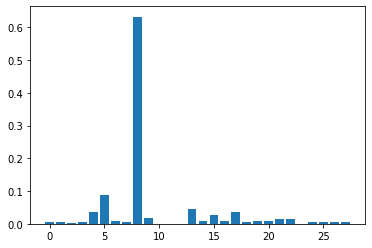

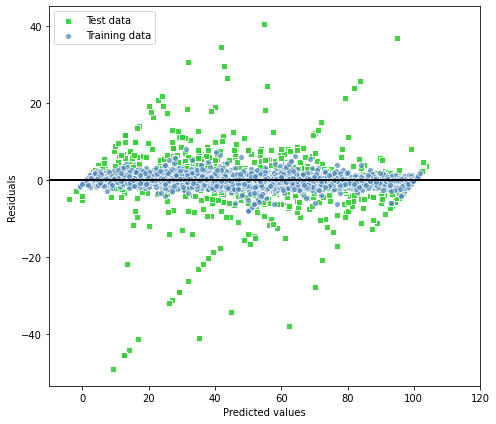

In [ ]:
gbr_h(X_train_r, X_val_r, y_train_r, y_val_r, X_test_r, y_test_r )

In [ ]:
X.columns

In [ ]:
from sklearn.svm import SVR

In [ ]:
def svr(X_train, X_val, y_train, y_val, X_test, y_test ):
    params = {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
    #val
    reg = SVR(**params)
    reg.fit(X_train, y_train)
    y_train_pred=reg.predict(X_train)
    y_val_pred=reg.predict(X_val)
    #test
    #y_test_pred=reg.predict(X_test)
    print(reg.get_params())
    print('MAE train: %.3f, val: %.3f' % (mean_absolute_error(y_train, y_train_pred),mean_absolute_error(y_val, y_val_pred)))
    #print('MSE test: %.3f' % mean_squared_error(y_test, y_test_pred))
    
    print('R^2 train: %.3f, val: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_val, y_val_pred)))
    
#     mse_tr3.append(mean_squared_error(y_train, y_train_pred))
#     mse_te3.append(mean_squared_error(y_val, y_val_pred))
#     rsq_tr3.append(r2_score(y_train, y_train_pred))
#     rsq_te3.append(r2_score(y_val, y_val_pred))
    

In [ ]:
def svr_h(X_train, X_val, y_train, y_val, X_test, y_test ):

    params = {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
    
    #val
    reg = SVR(**params)
    reg.fit(X_train, y_train)
    y_train_pred=reg.predict(X_train)
    y_val_pred=reg.predict(X_test)
    #test
    y_test_pred=reg.predict(X_test)
    
    #print('MSE train: %.3f, val: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_val, y_val_pred)))
    print('MAE test: %.3f' % mean_absolute_error(y_test, y_test_pred))
    
    print('R^2 test: %.3f' % (r2_score(y_test, y_test_pred)))
    

    plt.scatter(y_test_pred,  
                y_test_pred - y_test, 
                c='limegreen',
                edgecolor='white',
                marker='s', 
                s=35,
                alpha=0.9,
                label='Test data')
    plt.scatter(y_train_pred,  
                y_train_pred - y_train, 
                c='steelblue',
                edgecolor='white',
                marker='o', 
                s=35,
                alpha=0.7,
                label='Training data')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=-10, xmax=120, lw=2, color='black')
    plt.xlim([-10, 120])
    plt.tight_layout()

    #plt.savefig('GBR.png', dpi=300)
    plt.show()    


In [ ]:
svr(X_train_r, X_val_r, y_train_r, y_val_r, X_test_r, y_test_r )

{'C': 100, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 1, 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
MAE train: 0.100, val: 19.706
R^2 train: 1.000, val: 0.304


In [ ]:
svr(X_train_r, X_val_r, y_train_r, y_val_r, X_test_r, y_test_r )

{'C': 100, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 1, 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
MAE train: 0.199, val: 19.866
R^2 train: 0.998, val: 0.328


In [ ]:
svr(X_train_r, X_val_r, y_train_r, y_val_r, X_test_r, y_test_r )

{'C': 100, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 1, 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
MAE train: 0.100, val: 19.243
R^2 train: 1.000, val: 0.328


MAE test: 8.115
R^2 test: 0.792


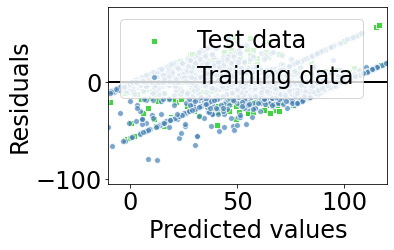

In [ ]:
svr_h(X_train_r, X_val_r, y_train_r, y_val_r, X_test_r, y_test_r )

In [ ]:
def rf(X_train, X_val, y_train, y_val, X_test, y_test ):

    #val
    reg = RandomForestRegressor()
    reg.fit(X_train, y_train)
    y_train_pred=reg.predict(X_train)
    y_val_pred=reg.predict(X_val)
    #test
    #y_test_pred=reg.predict(X_test)
    
    print('MAE train: %.3f, val: %.3f' % (mean_absolute_error(y_train, y_train_pred),mean_absolute_error(y_val, y_val_pred)))
    #print('MSE test: %.3f' % mean_squared_error(y_test, y_test_pred))
    
    
    print('R^2 train: %.3f, val: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_val, y_val_pred)))
    
#     mse_tr3.append(mean_squared_error(y_train, y_train_pred))
#     mse_te3.append(mean_squared_error(y_val, y_val_pred))
#     rsq_tr3.append(r2_score(y_train, y_train_pred))
#     rsq_te3.append(r2_score(y_val, y_val_pred))

In [ ]:
from matplotlib import pyplot

In [ ]:
def rf_h(X_train, X_val, y_train, y_val, X_test, y_test ):
    
    params = {'bootstrap': True, 'criterion': 'squared_error', 'max_depth': 110, 'max_features': 'auto', 'n_estimators': 200}
    #'criterion': 'squared_error', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 500
    #
    #val
    reg = RandomForestRegressor(**params)
    reg.fit(X_train, y_train)
    y_train_pred=reg.predict(X_train)
    y_val_pred=reg.predict(X_val)
    #test
    y_test_pred=reg.predict(X_test)
    
    #print('MSE train: %.3f, val: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_val, y_val_pred)))
    print('MAE test: %.3f' % mean_absolute_error(y_test, y_test_pred))
    
    print('R^2 test: %.3f' % (r2_score(y_test, y_test_pred)))
    
#     mse_tr3.append(mean_squared_error(y_train, y_train_pred))
#     mse_te3.append(mean_squared_error(y_val, y_val_pred))
#     rsq_tr3.append(r2_score(y_train, y_train_pred))
#     rsq_te3.append(r2_score(y_val, y_val_pred))

    importance = reg.feature_importances_
    # summarize feature importance
    for i,v in enumerate(importance):
      print('Feature: %0d, Score: %.5f' % (i,v))
    # plot feature importance
    pyplot.bar([x for x in range(len(importance))], importance)
    pyplot.show()

    plt.scatter(y_test_pred,  
                y_test_pred - y_test, 
                c='limegreen',
                edgecolor='white',
                marker='s', 
                s=35,
                alpha=0.9,
                label='Test data')
    plt.scatter(y_train_pred,  
                y_train_pred - y_train, 
                c='steelblue',
                edgecolor='white',
                marker='o', 
                s=35,
                alpha=0.2,
                label='Training data')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=-10, xmax=120, lw=2, color='black')
    plt.xlim([-10, 120])
    plt.tight_layout()

    #plt.savefig('GBR.png', dpi=300)
    plt.show()    


In [ ]:
rf(X_train_r, X_val_r, y_train_r, y_val_r, X_test_r, y_test_r )

MAE train: 2.195, val: 5.582
R^2 train: 0.986, val: 0.911


In [ ]:
rf(X_train_r, X_val_r, y_train_r, y_val_r, X_test_r, y_test_r )

MAE train: 4.145, val: 11.122
R^2 train: 0.966, val: 0.753


In [ ]:
rf(X_train_r, X_val_r, y_train_r, y_val_r, X_test_r, y_test_r )

MAE train: 2.227, val: 5.545
R^2 train: 0.986, val: 0.912


MAE test: 5.534
R^2 test: 0.908
Feature: 0, Score: 0.00781
Feature: 1, Score: 0.00519
Feature: 2, Score: 0.00018
Feature: 3, Score: 0.00035
Feature: 4, Score: 0.03979
Feature: 5, Score: 0.05640
Feature: 6, Score: 0.00751
Feature: 7, Score: 0.00506
Feature: 8, Score: 0.72022
Feature: 9, Score: 0.01179
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.07351
Feature: 14, Score: 0.00627
Feature: 15, Score: 0.00259
Feature: 16, Score: 0.00716
Feature: 17, Score: 0.02035
Feature: 18, Score: 0.00214
Feature: 19, Score: 0.00119
Feature: 20, Score: 0.00716
Feature: 21, Score: 0.00907
Feature: 22, Score: 0.00070
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00177
Feature: 25, Score: 0.00468
Feature: 26, Score: 0.00524
Feature: 27, Score: 0.00385


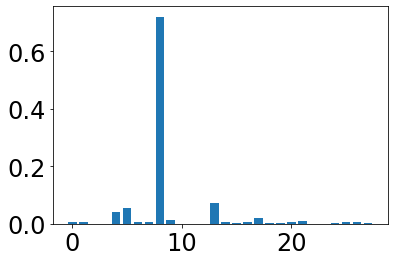

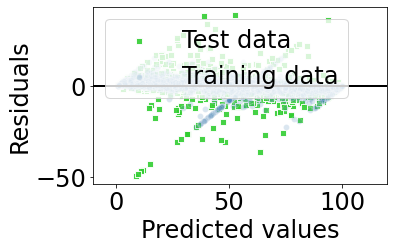

In [ ]:
rf_h(X_train_r, X_val_r, y_train_r, y_val_r, X_test_r, y_test_r )

In [ ]:
X_r.columns

Index(['largest_property_use_type_gross_floor_area_ft', 'year_built',
       'number_of_buildings', 'occupancy', 'site_eui_kbtu_ft',
       'weather_normalized_site_electricity_intensity_kwh_ft',
       'green_power_offsite_kwh', 'egrid_output_emissions_rate_kgco2e_mbtu',
       'percent_of_electricity_that_is_green_power',
       'multifamily_housing_total_number_of_residential_living_units_density_number_per_1_000_sq_ft',
       'multifamily_housing_number_of_residential_living_units_in_a_high_rise_building_density_number_per_1_000_sq_ft',
       'multifamily_housing_number_of_residential_living_units_in_a_mid_rise_building_5_9_stories',
       'multifamily_housing_number_of_residential_living_units_in_a_mid_rise_building_density_number_per_1_000_sq_ft',
       'multifamily_housing_percent_that_can_be_cooled',
       'multifamily_housing_percent_that_can_be_heated',
       'water_use_all_water_sources_kgal',
       'number_of_active_energy_meters_total',
       'number_of_active_ener

In [ ]:
import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

In [6]:
nam=['Ada Boost','Decision Tree','Gradient Boost', 'SVM', 'Random Forest']

In [11]:
fea=['Site EUI','Weather Norm Site Electricity Intensity','Number of Residential Units(mid rise building)',
     'Number of Residential Units(high rise building)','Number of Active Energy Meters','Gross Floor Area',
 'Year Built',
 'Water Use(all water sources)','Latitude']
resi=[68,6,6,3,3,0,0,0,0]
offi=[64,13,0,0,0,7,3,3,0]
educ=[44,41,0,0,0,3,3,0,2]
names=['Bronx Residential Buildings','Manhattan Office Buildings', 'Brooklyn Educational Buildings' ]
x = np.arange(len(fea))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()

#plt.figure(figsize=(50,10))
rects1 = ax.bar(x - width/2, resi, width, label='Bronx Residential Buildings')
rects2 = ax.bar(x + width/2, offi, width, label='Manhattan Office Buildings')
rects3 = ax.bar(x + 3*width/2, educ, width, label='Brooklyn Educational Buildings')

y_pos = np.arange(len(fea))
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Features')
ax.set_ylabel('Feature Importance (%)')
ax.set_title('Building Important Features')
ax.set_xticks(x, fea)
ax.legend(loc='upper right')

# ax.barh(fea, num, )
# ax.set_yticks(y_pos, fea)
# ax.invert_yaxis()  # labels read top-to-bottom
# ax.set_xlabel('Feature Importance (%)')
# ax.set_ylabel('Features ')
# ax.set_title('Bronx Residential Buildings Important Features')
# for i, v in enumerate(num):
    # plt.text(v+0.2, i, str(round(v, 2)), va="center")
plt.show()


NameError: ignored

In [ ]:
import textwrap
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

In [4]:
fea=['Site EUI','Weather Norm Site Electricity Intensity']
resi=[68,6]
offi=[64,13]
educ=[44,41]
names=['Bronx Residential Buildings','Manhattan Office Buildings', 'Brooklyn Educational Buildings' ]
# x = np.arange(len(fea))  # the label locations
# width = 0.2  # the width of the bars

# fig, ax = plt.subplots()

# #plt.figure(figsize=(50,10))
# rects1 = ax.bar(x - width/2, resi, width, label='Bronx Residential Buildings')
# rects2 = ax.bar(x + width/2, offi, width, label='Manhattan Office Buildings')
# rects3 = ax.bar(x + 3*width/2, educ, width, label='Brooklyn Educational Buildings')

# y_pos = np.arange(len(fea))
# # Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_xlabel('Features')
# ax.set_ylabel('Feature Importance (%)')
# ax.set_title('Building Important Features')
# #ax.set_xticks(x, fea)
# ax.set_xticks(x)
# ax.set_xticklabels(fea)
# ax.legend(loc='upper right')
# wrap_labels(ax, 30)
# ax.figure
# ax.barh(fea, num, )
# ax.set_yticks(y_pos, fea)
# ax.invert_yaxis()  # labels read top-to-bottom
# ax.set_xlabel('Feature Importance (%)')
# ax.set_ylabel(Features ')
# ax.set_title('Bronx Residential Buildings Important Features')
# for i, v in enumerate(num):
    # plt.text(v+0.2, i, str(round(v, 2)), va="center")
#plt.show()

import plotly.graph_objects as go
import plotly.graph_objects as px
  
plot = px.Figure(data=[go.Bar(
    name = 'Bronx Residential Buildings',
    x = fea,
    y = resi
   ),
                       go.Bar(
    name = 'Manhattan Office Buildings',
    x = fea,
    y = offi
   ),
                       go.Bar(
    name = 'Brooklyn Educational Buildings',
    x = fea,
    y = educ
   )
                       
])
plot.update_layout(
    title="Building Features Importance ",
    xaxis_title="Features",
    yaxis_title="Feature Importance (%)", font=dict(
        size=24,
        
    )
    
    
    )
plot.show()

In [2]:
import numpy as np

In [9]:
name=['Gradient Boost', 'Random Forest']

In [15]:
#reg
original=[12.21,12.41]
stand1=[6.05,5.58]
same1=[ 11.77,11.12]
no_same=[5.98,5.54]
x = np.arange(len(name))  # the label locations
width = 0.2  # the width of the bars
fig = go.Figure(data=[
    go.Bar(name='Original Data', x=name, y=original,text=original,
            textposition='auto'),
    go.Bar(name='Data without all EUI', x=name, y=same1,text=same1,
            textposition='auto'),
    go.Bar(name='Data without Source/Site EUI', x=name, y=stand1, text=stand1,
            textposition='auto'),
    go.Bar(name='Data with only EUI', x=name, y=no_same, text=no_same,
            textposition='auto')
])
# Change the bar mode

fig.update_layout(barmode='group',yaxis=dict(
        title='MAE'), font=dict(
        size=24,
        
    ), title= 'Comparing Error by Feature Reduction')
fig.show()

In [14]:
#No EUI
same=[11.43,8.59,6.05,24.90,5.59]
norm=[16.66,12.04,8.51,22.58,8.67]
stand=[12.13,8.63,6.05,19.73,5.58]
x = np.arange(len(nam))  # the label locations
width = 0.2  # the width of the bars

fig = go.Figure(data=[
    go.Bar(name='Original', x=nam, y=same,text=same,
            textposition='auto'),
    go.Bar(name='Normalize', x=nam, y=norm, text=norm,
            textposition='auto'),
    go.Bar(name='Standardize', x=nam, y=stand, text=stand,
            textposition='auto')
])
# Change the bar mode

fig.update_layout(barmode='group',title_text='MAE by Model',yaxis=dict(
        title='MAE'), font=dict(
        size=24))# without EUI
fig.show()

In [ ]:
same_diff = []
norm_diff=[]
stand_diff=[]
for item1, item2 in zip(same, same1):
    item = item1 - item2
    same_diff.append(item)
for item1, item2 in zip(norm, norm1):
    item = item1 - item2
    norm_diff.append(item)
for item1, item2 in zip(stand, stand1):
    item = item1 - item2
    stand_diff.append(item)
same_diff=[round(num, 2) for num in same_diff]
norm_diff=[round(num, 2) for num in norm_diff]
stand_diff=[round(num, 2) for num in stand_diff]

In [ ]:

#x = np.arange(len(nam))  # the label locations
fig = go.Figure(data=[
    go.Bar(name='Original', x=nam, y=same_diff,text=same_diff,
            textposition='auto'),
    go.Bar(name='Normalize', x=nam, y=norm_diff, text=norm_diff,
            textposition='auto'),
    go.Bar(name='Standardize', x=nam, y=stand_diff, text=stand_diff,
            textposition='auto')
])
# Change the bar mode

fig.update_layout(barmode='group',title_text='Difference in MAE without EUI',yaxis=dict(
        title='MAE'))
fig.show()

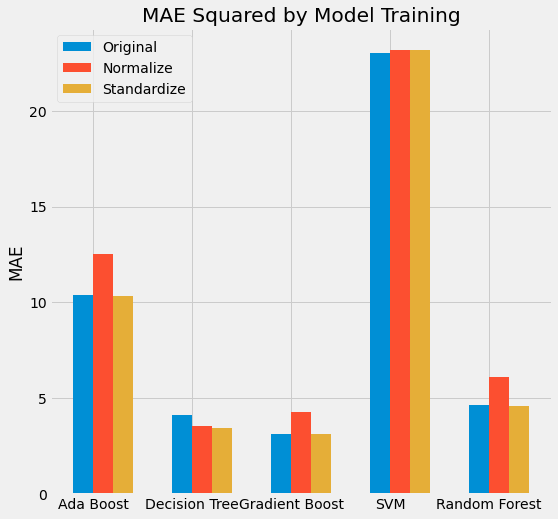

<Figure size 3600x720 with 0 Axes>

In [ ]:
#r2
same=[10.37, 4.11,3.12,23.00,4.66]
norm=[12.50,3.56,4.27,23.16,6.13]
stand=[10.33,3.43,3.12,23.14,4.61]
x = np.arange(len(nam))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
plt.figure(figsize=(50,10))
rects1 = ax.bar(x - width/2, same, width, label='Original')
rects2 = ax.bar(x + width/2, norm, width, label='Normalize')
rects3 = ax.bar(x + 3*width/2, stand, width, label='Standardize')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('MAE')
ax.set_title('MAE Squared by Model Training')
ax.set_xticks(x, nam)
ax.legend()

# ax.bar_label(rects1, padding=10)
# ax.bar_label(rects2, padding=10)
# ax.bar_label(rects3, padding=10)

#fig.tight_layout()

plt.show()

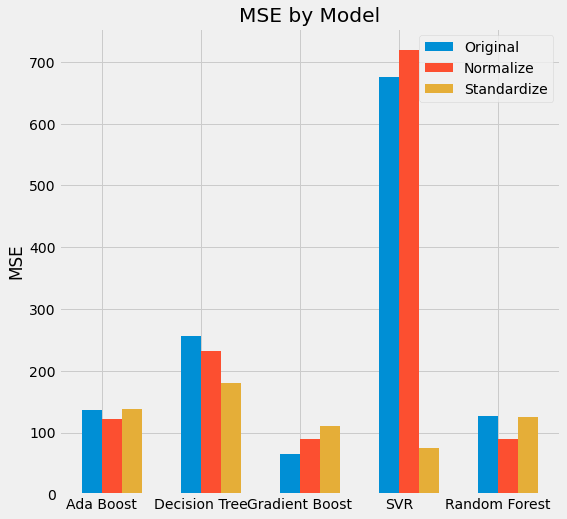

<Figure size 3600x720 with 0 Axes>

In [ ]:
#hyper
same=[136.76,256.92,64.66, 675.61,125.99]
norm=[122.33,232.58,90.25,719.21,89.53]
stand=[137.70,179.62,110.49,74.42,125.71]
x = np.arange(len(nam))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
plt.figure(figsize=(50,10))
rects1 = ax.bar(x - width/2, same, width, label='Original')
rects2 = ax.bar(x + width/2, norm, width, label='Normalize')
rects3 = ax.bar(x + 3*width/2, stand, width, label='Standardize')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('MSE')
ax.set_title('MSE by Model')
ax.set_xticks(x, nam)
ax.legend()

# ax.bar_label(rects1, padding=10)
# ax.bar_label(rects2, padding=10)
# ax.bar_label(rects3, padding=10)

#fig.tight_layout()

plt.show()

HYPERPARAMETER TUNING

In [ ]:
import xgboost

In [ ]:
from sklearn.metrics import make_scorer
scorer = make_scorer(mean_absolute_error, greater_is_better=False)

In [ ]:
parameters = {'learning_rate': [0.1,0.2,0.3,0.4],
                  'subsample'    : [1,.9,.7, .5, .2, .1],
                  'n_estimators' : [50,100,200,500,1000, 1500],
                  'max_depth'    : [1,2,3,4,6,8,10],
               
                 }

#{ 'learning_rate': 0.1, 'max_depth': 3,  'n_estimators': 100, 'n_jobs': 1,'subsample': 1}
#'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1
GBR = xgboost.XGBRegressor()
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(X_train, y_train)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

[23:39:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
 Results from Grid Search 

 The best estimator across ALL searched params:
 XGBRegressor(max_depth=6, n_estimators=200, subsample=0.9)

 The best score across ALL searched params:
 0.8243349783373468

 The best parameters across ALL searched params:
 {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.9}


In [ ]:
parameters = {
   'n_estimators': [5,20,50, 100, 200, 500,1000],
   'max_features': ['auto', 'sqrt', 'log2'],
   'criterion' :['squared_error', 'absolute_error'],
   'bootstrap' : [True, False],
   "max_depth" : [None,1,3,5,7,9,11,12],
   'min_samples_split' : [1,2,3,5,6,8,10], # minimum sample number to split a node
   "min_samples_leaf":[1,2,3,5,6,8,10]
  
}

#{'criterion': 'squared_error',  'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 100,  }

GBR = RandomForestRegressor()
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(X_train, y_train)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

In [ ]:
parameters = {"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90]}
GBR = DecisionTreeRegressor()
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1,scoring=scorer)
grid_GBR.fit(X_train, y_train)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 DecisionTreeRegressor(max_depth=11, max_leaf_nodes=60, min_samples_leaf=2,
                      splitter='random')

 The best score across ALL searched params:
 -8.470366707606392

 The best parameters across ALL searched params:
 {'max_depth': 11, 'max_features': None, 'max_leaf_nodes': 60, 'min_samples_leaf': 2, 'splitter': 'random'}


In [ ]:
parameters = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
#{'C': 100, 'epsilon': 0.1, 'gamma': 1, 'kernel': 'rbf', }

GBR = SVR()
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(X_train_r, y_train_r)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 SVR(C=1000, gamma=0.01)

 The best score across ALL searched params:
 0.7628474172420205

 The best parameters across ALL searched params:
 {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}


In [ ]:
parameters = {
 'n_estimators': [50, 100],
 'learning_rate' : [0.01, 0.05, 0.1, 0.5],
 'loss' : ['linear', 'square', 'exponential']
 }
GBR = AdaBoostRegressor()
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1,scoring=scorer)
grid_GBR.fit(X_train, y_train)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 AdaBoostRegressor(learning_rate=0.05, n_estimators=100)

 The best score across ALL searched params:
 -9.259703768972692

 The best parameters across ALL searched params:
 {'learning_rate': 0.05, 'loss': 'linear', 'n_estimators': 100}


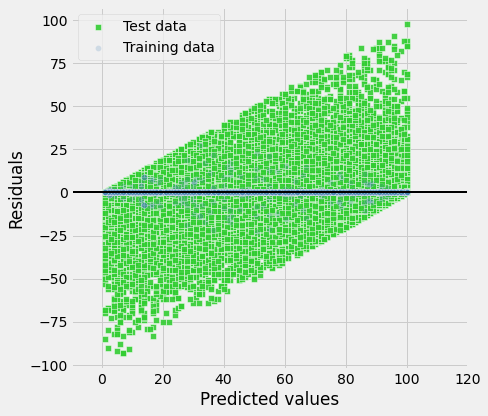

In [ ]:
fig = plt.figure(figsize=(7, 6))

plt.scatter(y_val_pred,  
            y_val_pred - y_val, 
            c='limegreen',
            edgecolor='white',
            marker='s', 
            s=35,
            alpha=0.9,
            label='Test data')
plt.scatter(y_train_pred,  
            y_train_pred - y_train, 
            c='steelblue',
            edgecolor='white',
            marker='o', 
            s=35,
            alpha=0.2,
            label='Training data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=120, lw=2, color='black')
plt.xlim([-10, 120])
plt.tight_layout()

#plt.savefig('GBR.png', dpi=300)
plt.show()    

In [ ]:
feature_importance = regressor.feature_importances_
sorted_idx = np.argsort(feature_importance)[:6]
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(5, 7))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(features.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")


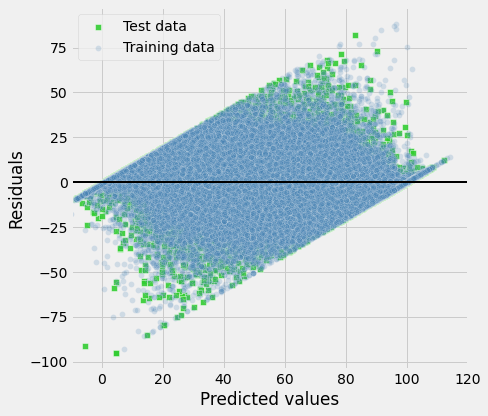

In [ ]:
fig = plt.figure(figsize=(7, 6))

plt.scatter(y_val_pred,  
            y_val_pred - y_val, 
            c='limegreen',
            edgecolor='white',
            marker='s', 
            s=35,
            alpha=0.9,
            label='Test data')
plt.scatter(y_train_pred,  
            y_train_pred - y_train, 
            c='steelblue',
            edgecolor='white',
            marker='o', 
            s=35,
            alpha=0.2,
            label='Training data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=120, lw=2, color='black')
plt.xlim([-10, 120])
plt.tight_layout()

#plt.savefig('GBR.png', dpi=300)
plt.show()    